In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset
dataset = pd.read_csv('data/dataset_collaboration_with_survey_scores.csv')

# Filter the data for project 4
dataset_project_4 = dataset[dataset['project'] == 4]
dataset_project_4.head()

,id,project,meeting_number,speaker_number,speech_frequency,total_words,duration,normalized_speech_frequency,speaker_id,next_speaker_id,...,interaction_equality_index,degree_centrality,indegree_centrality,outdegree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,overall_collaboration_score,individual_collaboration_score
80,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,0,...,0.330335,116,58,58,0.25,0.125,0.573573,0.23775,3,4.0
81,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,1,...,0.330335,116,58,58,0.25,0.125,0.573573,0.23775,3,3.0
82,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,2,...,0.330335,116,58,58,0.25,0.125,0.573573,0.23775,3,3.0
83,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,3,...,0.330335,116,58,58,0.25,0.125,0.573573,0.23775,3,6.0
84,4_0_SPEAKER_00,4,1,0,1294,12023,119,10.87395,0,4,...,0.330335,116,58,58,0.25,0.125,0.573573,0.23775,3,3.0


## Mean of Overall Collaboration Score by Meeting

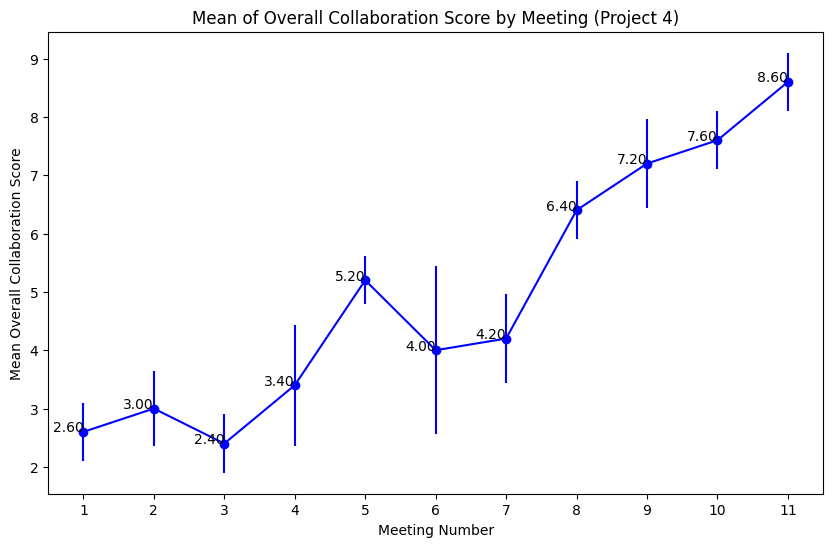

In [2]:
# Calculate mean and standard deviation of overall collaboration score by meeting
overall_score_by_meeting = dataset_project_4.groupby('meeting_number')['overall_collaboration_score'].agg(['mean', 'std']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=overall_score_by_meeting, x='meeting_number', y='mean', marker='o', color='b')
plt.errorbar(overall_score_by_meeting['meeting_number'], overall_score_by_meeting['mean'], yerr=overall_score_by_meeting['std'], fmt='o', color='b')
for i in range(len(overall_score_by_meeting)):
    plt.text(overall_score_by_meeting['meeting_number'][i], overall_score_by_meeting['mean'][i],
             f"{overall_score_by_meeting['mean'][i]:.2f}", ha='right', color='black')
plt.xticks(ticks=overall_score_by_meeting['meeting_number'].unique())
plt.title('Mean of Overall Collaboration Score by Meeting (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Overall Collaboration Score')
plt.show()


## Overall Collaboration Score by Meeting for Each Speaker

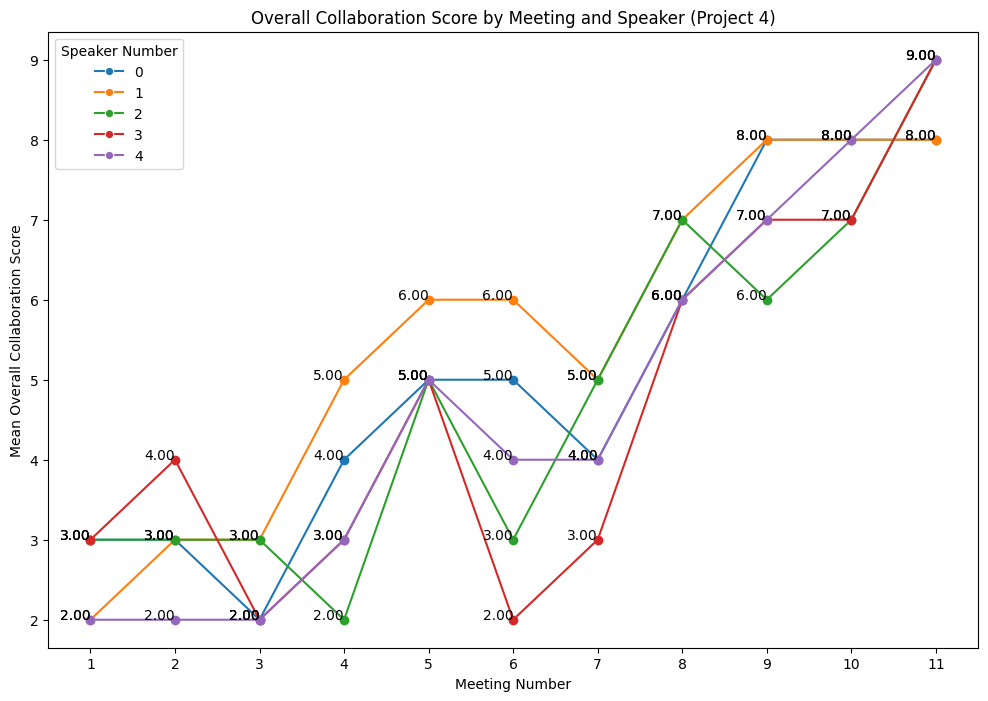

In [3]:
# Calculate mean and standard error of overall collaboration score by meeting and speaker
overall_score_by_meeting_speaker = dataset_project_4.groupby(['meeting_number', 'speaker_number'])['overall_collaboration_score'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette('tab10', n_colors=overall_score_by_meeting_speaker['speaker_number'].nunique())
sns.lineplot(data=overall_score_by_meeting_speaker, x='meeting_number', y='mean', hue='speaker_number', marker='o', palette=palette)
for speaker in overall_score_by_meeting_speaker['speaker_number'].unique():
    speaker_data = overall_score_by_meeting_speaker[overall_score_by_meeting_speaker['speaker_number'] == speaker]
    plt.errorbar(speaker_data['meeting_number'], speaker_data['mean'], yerr=speaker_data['sem'], fmt='o', color=palette[speaker % len(palette)])
    for i in range(len(speaker_data)):
        plt.text(speaker_data['meeting_number'].iloc[i], speaker_data['mean'].iloc[i],
                 f"{speaker_data['mean'].iloc[i]:.2f}", ha='right', color='black')
plt.xticks(ticks=overall_score_by_meeting_speaker['meeting_number'].unique())
plt.title('Overall Collaboration Score by Meeting and Speaker (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Overall Collaboration Score')
plt.legend(title='Speaker Number')
plt.show()


## Individual Collaboration Score by Meeting (Self)

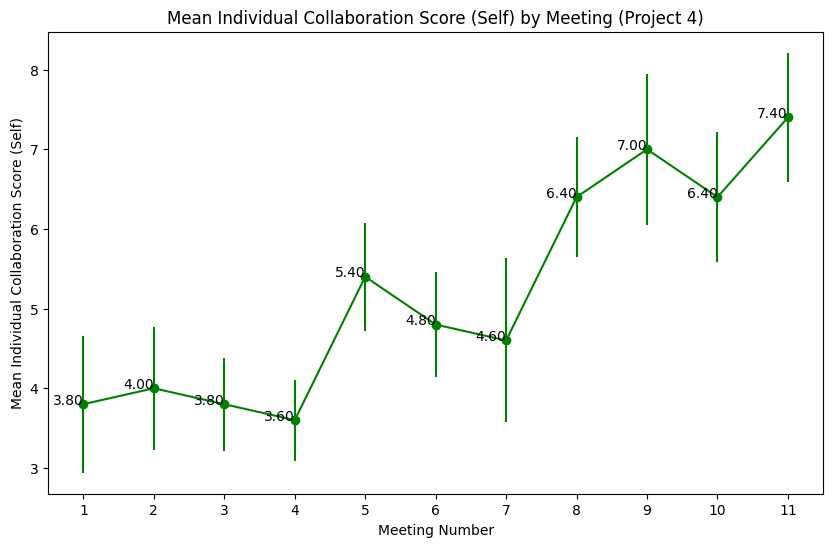

In [4]:
# Individual collaboration score (self) by meeting
self_scores = dataset_project_4[dataset_project_4['speaker_id'] == dataset_project_4['next_speaker_id']].groupby('meeting_number')['individual_collaboration_score'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=self_scores, x='meeting_number', y='mean', marker='o', color='g')
plt.errorbar(self_scores['meeting_number'], self_scores['mean'], yerr=self_scores['sem'], fmt='o', color='g')
for i in range(len(self_scores)):
    plt.text(self_scores['meeting_number'][i], self_scores['mean'][i],
             f"{self_scores['mean'][i]:.2f}", ha='right', color='black')
plt.xticks(ticks=self_scores['meeting_number'])
plt.title('Mean Individual Collaboration Score (Self) by Meeting (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Individual Collaboration Score (Self)')
plt.show()

## Individual Collaboration Score by Meeting (Self) by Each Speaker

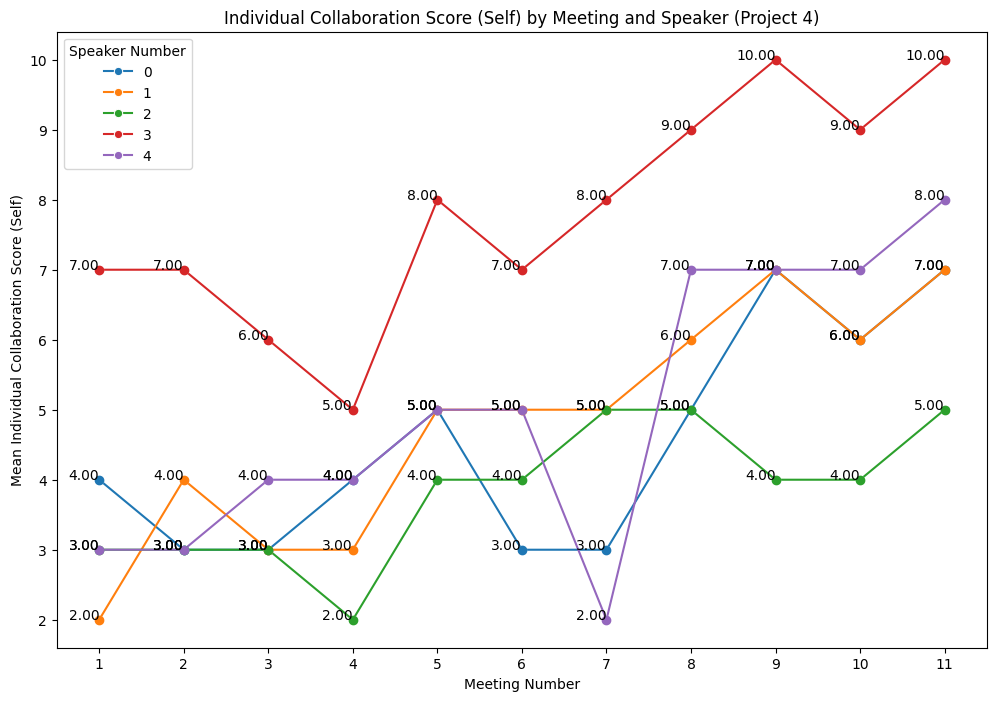

In [5]:
# Individual collaboration score (self) by meeting and speaker
self_scores_by_speaker = dataset_project_4[dataset_project_4['speaker_id'] == dataset_project_4['next_speaker_id']].groupby(['meeting_number', 'speaker_number'])['individual_collaboration_score'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette('tab10', n_colors=self_scores_by_speaker['speaker_number'].nunique())
sns.lineplot(data=self_scores_by_speaker, x='meeting_number', y='mean', hue='speaker_number', marker='o', palette=palette)
for speaker in self_scores_by_speaker['speaker_number'].unique():
    speaker_data = self_scores_by_speaker[self_scores_by_speaker['speaker_number'] == speaker]
    plt.errorbar(speaker_data['meeting_number'], speaker_data['mean'], yerr=speaker_data['sem'], fmt='o', color=palette[speaker % len(palette)])
    for i in range(len(speaker_data)):
        plt.text(speaker_data['meeting_number'].iloc[i], speaker_data['mean'].iloc[i],
                 f"{speaker_data['mean'].iloc[i]:.2f}", ha='right', color='black')
plt.xticks(ticks=self_scores_by_speaker['meeting_number'].unique())
plt.title('Individual Collaboration Score (Self) by Meeting and Speaker (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Individual Collaboration Score (Self)')
plt.legend(title='Speaker Number')
plt.show()

## Individual Collaboration Score by Meeting (Others)

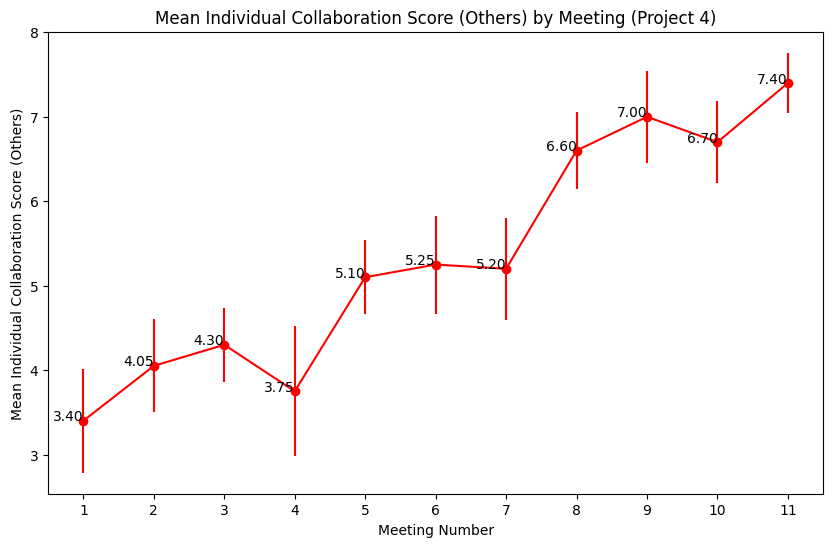

In [6]:
# Individual collaboration score (others) by meeting
others_scores = dataset_project_4[dataset_project_4['speaker_id'] != dataset_project_4['next_speaker_id']].groupby(['meeting_number', 'next_speaker_id'])['individual_collaboration_score'].agg(['mean', 'sem']).reset_index()
others_scores_mean = others_scores.groupby('meeting_number')['mean'].mean().reset_index()
others_scores_mean['sem'] = others_scores.groupby('meeting_number')['mean'].sem().values

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=others_scores_mean, x='meeting_number', y='mean', marker='o', color='r')
plt.errorbar(others_scores_mean['meeting_number'], others_scores_mean['mean'], yerr=others_scores_mean['sem'], fmt='o', color='r')
for i in range(len(others_scores_mean)):
    plt.text(others_scores_mean['meeting_number'][i], others_scores_mean['mean'][i],
             f"{others_scores_mean['mean'][i]:.2f}", ha='right', color='black')
plt.xticks(ticks=others_scores_mean['meeting_number'])
plt.title('Mean Individual Collaboration Score (Others) by Meeting (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Individual Collaboration Score (Others)')
plt.show()

## Individual Collaboration Score by Meeting (Others) by Each Speaker

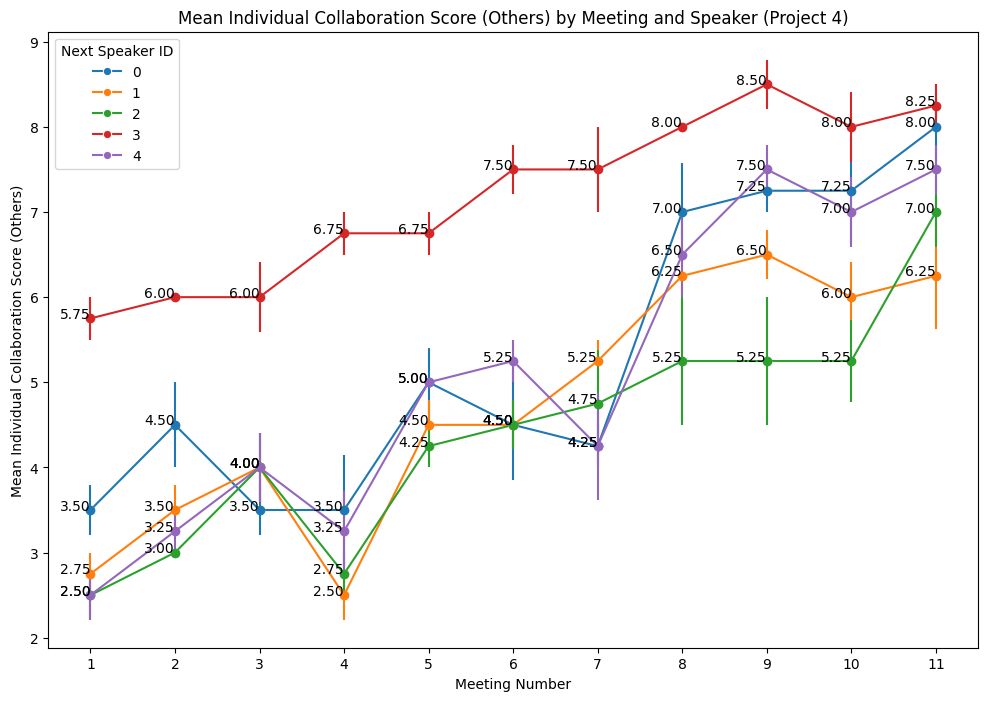

In [7]:
# Individual collaboration score (others) by meeting and speaker
others_scores_by_speaker = dataset_project_4[dataset_project_4['speaker_id'] != dataset_project_4['next_speaker_id']].groupby(['meeting_number', 'next_speaker_id'])['individual_collaboration_score'].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette('tab10', n_colors=others_scores_by_speaker['next_speaker_id'].nunique())
sns.lineplot(data=others_scores_by_speaker, x='meeting_number', y='mean', hue='next_speaker_id', marker='o', palette=palette)
for speaker in others_scores_by_speaker['next_speaker_id'].unique():
    speaker_data = others_scores_by_speaker[others_scores_by_speaker['next_speaker_id'] == speaker]
    plt.errorbar(speaker_data['meeting_number'], speaker_data['mean'], yerr=speaker_data['sem'], fmt='o', color=palette[speaker % len(palette)])
    for i in range(len(speaker_data)):
        plt.text(speaker_data['meeting_number'].iloc[i], speaker_data['mean'].iloc[i],
                 f"{speaker_data['mean'].iloc[i]:.2f}", ha='right', color='black')
plt.xticks(ticks=others_scores_by_speaker['meeting_number'].unique())
plt.title('Mean Individual Collaboration Score (Others) by Meeting and Speaker (Project 4)')
plt.xlabel('Meeting Number')
plt.ylabel('Mean Individual Collaboration Score (Others)')
plt.legend(title='Next Speaker ID')
plt.show()